# MNIST with CNN

The __MNIST__ dataset, which is available in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API, is a collection of grayscale 28x28 pixel handwritten digit images which is suitable for a basic classification task. The labels are returned as a number list mapping the related numbers:

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |

In this project, MNIST dataset is handled with a CNN to improve the training accuracy over 99.5%.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Label: 6


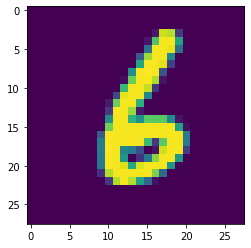

In [4]:
# load the MNIST dataset
mnist = tf.keras.datasets.mnist

# to get the data from a local directory, add related path to current directory
#current_dir = os.getcwd() 
#data_path = os.path.join(current_dir, "data/mnist.npz")

# load only the training set of the MNIST dataset
(train_img, train_lab), _ = mnist.load_data()

# pick a random image from the dataset
i = np.random.randint(train_lab.shape[0], size=1)[0]

# print image and label of the randomly selected sample
print("Label:", train_lab[i])
#print("Image as NumPy array: \n", train_img[i])

# visualize the image
plt.imshow(train_img[i])

Before training the model, it is essential to prepare the data to feed the neural network. Here, two transformations are applied to the data:

- __Reshape:__ Commonly 3-dimensional arrays (without the batch dimension) are used to represent image data. The third dimension represents the color channels using RGB values. Hence, the data is reshaped by adding an extra dimension. Even though MNIST dataset is in black and white format, adding the third dimension is a good practice.

- __Normalize:__ The pixel values are normalized between 0 and 1 by dividing every value in the array by the maximum. Normalization is essential for a speedy, more accurate and high performance training as it reduces the effects of feature scales.

In [5]:
# prepare the data by applying transformations (reshape, normalize)

# reshape the images to add an extra dimension
train_img = np.expand_dims(train_img, axis = -1)
    
# normalize the pixel values from (0, 255) to (0, 1)
train_img  = train_img / 255.0

print("Maximum pixel value after normalization:", np.max(train_img))
print("Shape of training set after reshaping:", train_img.shape)
print("Shape of an image after reshaping:", train_img[0].shape)

Maximum pixel value after normalization: 1.0
Shape of training set after reshaping: (60000, 28, 28, 1)
Shape of an image after reshaping: (28, 28, 1)


In [8]:
# create a callback to ensure 99.5% accuracy limit
class myCallback(tf.keras.callbacks.Callback):
    
    # check certain condition when the current epoch ends
    def on_epoch_end(self, epoch, logs={}):
        
        # if accuracy exists and gets higher than 0.995, stop training
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
            print("\nReached 99.5% accuracy, training is terminated.")
            self.model.stop_training = True

The model is created with 5 layers:
- A Conv2D layer with 32 filters, a kernel_size of 3x3, ReLU activation function
-  A MaxPooling2D layer with a pool_size of 2x2
- A Flatten layer with no arguments
- A Dense layer with 128 units and ReLU activation function
- A Dense layer with 10 units and softmax activation function

and optimized with Adam optimizer using sparse categorical crossentropy loss.

In [9]:
# define the convolutional model
def conv_model():
    model = tf.keras.models.Sequential([ 
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    # compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
        
    return model

In [10]:
# instantiate class to add callback while training
callbacks = myCallback()

# save the untrained model
model = conv_model()

# train the model
history = model.fit(train_img, train_lab, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 69s 13ms/step - loss: 0.1409 - accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0480 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0312 - accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9962
Reached 99.5% accuracy, training is terminated.
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0124 - accuracy: 0.9961


In [11]:
# print the model summary
model.summary()

# check the training history
print("The model was trained for", len(history.epoch), "epochs")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________